# Trabajo del día miércoles 24 de marzo de 2021 | Doncan Alexis Sánchez Rico

## Introducción

En el siguiente documento de trabajo, se presentan una serie de ejercicios relacionados al curso de Machine Learning del CIC-IPN. El 50% de estos ejercicios son obligatorios para la evaluación final. Deberá elegir al menos uno de cada dos ejercicios para resolverlos y enviarlos al correo dragonnomada123 con el sujeto *Machine Learning IPN - Trabajo 8 marzo 2021*. En el contenido del correo deberá especificar su nombre completo y adjuntar el archivo *.ipynb* que contenga los ejercicios resueltos, en la primera celda de la _notebook_ deberá repetir en el título *Machine Learning IPN - Trabajo 8 marzo 2021* y su nombre completo. No hay fecha de entrega obligatoria, pero si no recibe correo de confirmación de entrega, deberá ser responsable de insistir en la entrega y respuesta.

En este trabajo usaremos a `datasets/iris.data`, el cuál contiene 5 columnas con información de las medidas de las flores Iris y su clasificación de muestras. En las siguientes celdas se muestra la extracción y estructuración de las 150 muestras en los conjuntos `X` y `Y`.

Revise los códigos y resuelva los puntos marcados al final.

## Ejercicios - Redes neuronales

1. Continua el estudio de clase para el reconocimiento de dígitos de `notebooks/12. Multilayer Neural Network Classifier.ipynb`.
2. Dibuja en paint un dígito a mano y guardalo como una imagen PNG.
3. Abre la imagen en Python con Pillow. Pista https://www.geeksforgeeks.org/python-pil-image-resize-method/
4. Escala la imagen a 28x28 pixeles.
5. Convierte la imagen a un array de numpy. Pista https://www.geeksforgeeks.org/how-to-convert-images-to-numpy-array/
6. Usa `rgb2gray` de `skimage` para convertir la imagen de RGB a escala de grises. https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_rgb_to_gray.html#sphx-glr-auto-examples-color-exposure-plot-rgb-to-gray-py
7. Refigura la imagen para que sea un vector de 768 entradas.
8. Predice que dígito responde el clasificador y comenta si funcionó o se equivocó.

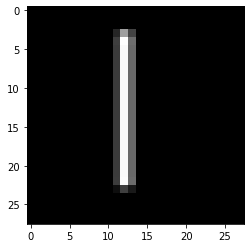

In [15]:
from PIL import Image
# from numpy import asarray
import numpy as np
import matplotlib.pyplot as plt

from skimage.color import rgb2gray, rgba2rgb

img = Image.open("./datasets/el_1_r.png")
img = img.resize((28,28))
array_img = np.asarray(img)
gray_scale = rgb2gray(rgba2rgb(array_img))
# gray_scale = array_img
plt.imshow(gray_scale, cmap="gray")


Meidante pickle guardé el clasificador que realizamos en clase con la siguiente configuración y score de 0.9394.

```py
clf = MLPClassifier(hidden_layer_sizes=(20,60,20))
```

In [16]:
import pickle

def decode(dig_enc):
    maxv = 0
    maxi = 0
    for index, value in enumerate(dig_enc):
        if value > maxv:
            maxv = value
            maxi = index
    return maxi
gray_scale = gray_scale.reshape((784,))
with open('../notebooks/clf.pickle', 'rb') as f:
    clf = pickle.load(f)

predict_label = clf.predict([gray_scale])[0]

decode(predict_label)

2

Realicé varias pruebas pero el resultado siempre fue el mismo, intenté con el fondo blanco y el fondo negro, pero al parecer no predice de la manera correcta. Concluí que debido a que el conjunto de entrenamiento es muy diferente a la imagen que estamos probando ya que esta en escala de grises.